In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
from sklearn import datasets,metrics

In [3]:
from sklearn.naive_bayes import GaussianNB

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


In [8]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
y_predict=model.predict(x_test)
y_predict

array([2, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 0, 2, 2, 1,
       1])

In [10]:
print("Number of mislabeled points out of a total %d points : %d",(x_test.shape[0], (y_test != y_predict).sum()))

Number of mislabeled points out of a total %d points : %d (45, 3)


In [11]:
count=0
count_error=0
print(len(y_test))
print(len(y_predict))
print(len(y_test))
count=(y_test==y_predict).sum()
print(count)
print("the predict in percentage is :",(count/len(y_test)))

45
45
45
42
the predict in percentage is : 0.9333333333333333


In [12]:
model.predict_proba(x_test)

array([[6.15666196e-219, 1.12703696e-009, 9.99999999e-001],
       [1.35315837e-198, 1.13324899e-006, 9.99998867e-001],
       [1.00000000e+000, 1.69131041e-018, 2.98831847e-026],
       [2.83221253e-078, 9.99538870e-001, 4.61130046e-004],
       [2.18473264e-249, 4.43958559e-012, 1.00000000e+000],
       [1.00000000e+000, 9.49881287e-019, 1.08138364e-026],
       [1.00000000e+000, 1.42573614e-018, 6.26378013e-027],
       [2.65479629e-165, 3.06953042e-006, 9.99996930e-001],
       [1.00000000e+000, 4.17163911e-018, 2.60467870e-026],
       [2.94875851e-068, 9.99714154e-001, 2.85846424e-004],
       [2.80727767e-042, 9.99999088e-001, 9.12175960e-007],
       [1.34042396e-222, 2.28892445e-011, 1.00000000e+000],
       [2.16047294e-095, 9.76197876e-001, 2.38021239e-002],
       [1.00000000e+000, 1.27555095e-014, 7.67976199e-023],
       [3.53472902e-049, 9.99979012e-001, 2.09884427e-005],
       [2.36650363e-055, 9.99974344e-001, 2.56562415e-005],
       [2.25711684e-064, 9.99810720e-001

In [13]:
model.predict_log_proba(x_test)

array([[-5.02448601e+02, -2.06036738e+01, -1.12703624e-09],
       [-4.55609407e+02, -1.36904218e+01, -1.13324963e-06],
       [ 0.00000000e+00, -4.09210281e+01, -5.87725016e+01],
       [-1.78560579e+02, -4.61236399e-04, -7.68183046e+00],
       [-5.72562195e+02, -2.61404601e+01, -4.43911574e-12],
       [ 0.00000000e+00, -4.14979499e+01, -5.97889711e+01],
       [ 0.00000000e+00, -4.10918434e+01, -6.03350137e+01],
       [-3.78950172e+02, -1.26939860e+01, -3.06953513e-06],
       [ 0.00000000e+00, -4.00182226e+01, -5.89099031e+01],
       [-1.55494402e+02, -2.85887285e-04, -8.16005587e+00],
       [-9.56763587e+01, -9.12176376e-07, -1.39074329e+01],
       [-5.10880905e+02, -2.45003540e+01, -2.28892461e-11],
       [-2.17975257e+02, -2.40899712e-02, -3.73798046e+00],
       [-1.26565425e-14, -3.19928131e+01, -5.09208686e+01],
       [-1.11564033e+02, -2.09886630e-05, -1.07715386e+01],
       [-1.25780767e+02, -2.56565706e-05, -1.05707237e+01],
       [-1.46551358e+02, -1.89298234e-04

In [14]:
print(metrics.classification_report(y_predict,y_test))
confusion_metrics=metrics.confusion_matrix(y_predict,y_test)
print(confusion_metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.88      0.91        17
           2       0.87      0.93      0.90        14

    accuracy                           0.93        45
   macro avg       0.93      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45

[[14  0  0]
 [ 0 15  2]
 [ 0  1 13]]


In [15]:
import matplotlib.pyplot as plt
plt.imshow(confusion_metrics, cmap='binary',)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [16]:
import seaborn as sns

/home/sushil/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


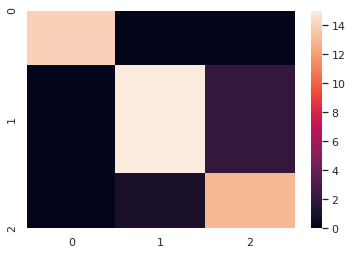

In [17]:
sns.set()
sns.heatmap(confusion_metrics)
plt.show()

In [18]:
df_cm = pd.DataFrame(confusion_metrics, range(3), range(3))

In [19]:
df_cm

,0,1,2
0,14,0,0
1,0,15,2
2,0,1,13


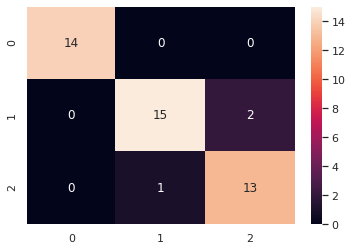

In [32]:
ax=sns.heatmap(df_cm,annot=True,annot_kws={"size": 12})
sns.set(font_scale=1.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [24]:
import matplotlib
matplotlib.__version__

'3.1.1'

In [158]:
datasets=pd.read_csv("/home/sushil/Downloads/databases/diabetes.csv")

In [159]:
print(datasets.head())
print(datasets.dtypes)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome        

In [160]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [161]:
#df['DataFrame Column'] = df['DataFrame Column'].astype(float)
#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')

In [162]:
datasets.shape

(768, 9)

In [163]:
datasets.iloc[:,:] = datasets.iloc[:,:].astype(float)

In [164]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [113]:
#alternate method of splitind data
df = pd.DataFrame(np.random.randn(100, 2))

msk = np.random.rand(len(df)) < 0.8

train = df[msk]

test = df[~msk]

print(train.shape)
print(test.shape)

(80, 2)
(20, 2)


In [133]:
msk = np.random.rand(len(datasets)) < 0.8
train=datasets[msk]
print(train.shape)
test=datasets[~msk]
print(test.shape)
print("*"*100)
train
x_train=train.drop(columns="Outcome")
print(x_train.head(1))
print("*"*100)
y_train=train.Outcome
print(y_train.head(2))
print("*"*100)
x_test=test.drop(columns="Outcome")
print(x_test.shape)
y_test=test.Outcome
print("*"*100)
print(y_test.shape)

(617, 9)
(151, 9)
****************************************************************************************************
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
****************************************************************************************************
0    1.0
1    0.0
Name: Outcome, dtype: float64
****************************************************************************************************
(151, 8)
****************************************************************************************************
(151,)


In [169]:
from sklearn.model_selection import train_test_split 

In [172]:
X=datasets.drop(columns="Outcome")
X.head()
y=datasets.Outcome
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [173]:
y.valuescounts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

In [174]:
#hence we can say that our datasets is imbalanced datasets

In [175]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(537, 8)
(231, 8)
(537,)
(231,)


In [176]:
from sklearn.preprocessing import StandardScaler
#df = StandardScaler().fit_transform(df[['cost', 'sales']])
#here we are standardizing our data so that i wont be affected by scale

In [177]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.fit_transform(x_test)

In [181]:
print(x_train.shape)
print(x_test.shape)
print(type(x_train))

(537, 8)
(231, 8)
<class 'numpy.ndarray'>


In [182]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [183]:
from sklearn.naive_bayes import GaussianNB

In [184]:
from sklearn.naive_bayes import BernoulliNB

In [185]:
model=GaussianNB()

In [186]:
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [188]:
y_predict=model.predict(x_test)
y_predict

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [189]:
y_predict_pro=model.predict_proba(x_test)

In [190]:
y_predict_pro

array([[7.41655011e-01, 2.58344989e-01],
       [3.46458262e-01, 6.53541738e-01],
       [9.45829239e-02, 9.05417076e-01],
       [9.46178272e-01, 5.38217281e-02],
       [9.25183109e-01, 7.48168908e-02],
       [3.06806022e-01, 6.93193978e-01],
       [7.10437603e-02, 9.28956240e-01],
       [3.10692190e-01, 6.89307810e-01],
       [6.28222738e-01, 3.71777262e-01],
       [2.55899946e-01, 7.44100054e-01],
       [9.42339879e-01, 5.76601213e-02],
       [5.99424773e-01, 4.00575227e-01],
       [1.04989121e-01, 8.95010879e-01],
       [9.48632544e-01, 5.13674563e-02],
       [1.51476507e-01, 8.48523493e-01],
       [9.48192062e-01, 5.18079377e-02],
       [7.70087069e-01, 2.29912931e-01],
       [1.46984416e-01, 8.53015584e-01],
       [3.02398852e-01, 6.97601148e-01],
       [7.81904412e-01, 2.18095588e-01],
       [8.63924860e-01, 1.36075140e-01],
       [9.43135266e-01, 5.68647340e-02],
       [9.78894770e-01, 2.11052302e-02],
       [8.60342117e-01, 1.39657883e-01],
       [6.626030

in above predict_probability array, it is comparing the value (0:7.41655011e-01) and (1:2.58344989e-01) so here we can see the probability of 0 is high hence the patience has no diabetes

In [197]:
#print("the probability of correct ans is ",)
print("the total length of y_test:",len(y_test))
count=(y_test==y_predict).sum()
print("total correct y_predicted:",count)
print("the predict in percentage is :",(count/len(y_test)))

the total length of y_test: 231
total correct y_predicted: 169
the predict in percentage is : 0.7316017316017316


In [198]:
from sklearn import metrics

In [199]:
from sklearn.metrics import accuracy_score

In [208]:
accuracy=accuracy_score(y_test,y_predict)
classification_reports=metrics.classification_report(y_test,y_predict)
print("the accuracy :",accuracy)
print("+"*50)
print("the classification reports",classification_reports)
confusion_mat=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
print("+"*50)
print("the confusion matrix:");print(confusion_mat)

the accuracy : 0.7316017316017316
++++++++++++++++++++++++++++++++++++++++++++++++++
the classification reports               precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       146
         1.0       0.66      0.56      0.61        85

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.73      0.73       231

++++++++++++++++++++++++++++++++++++++++++++++++++
the confusion matrix:
[[121  25]
 [ 37  48]]


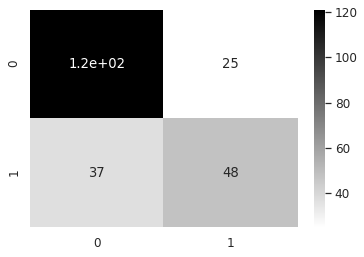

In [212]:
ax=sns.heatmap(confusion_mat,cmap="binary",annot=True)
sns.set(font_scale=1.1)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()